In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import pearsonr


In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/RishiMahadevan/Phillips-curve/main/dataindia.csv')

In [3]:
df.head()

,Year,Inflation Rate,Unemployment Rate
0,2020,6.62,7.11
1,2019,3.72,5.27
2,2018,3.95,5.33
3,2017,3.33,5.41
4,2016,4.95,5.51


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               30 non-null     int64  
 1   Inflation Rate     30 non-null     float64
 2   Unemployment Rate  30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [5]:
df.shape

(30, 3)

In [6]:
df.dropna()

,Year,Inflation Rate,Unemployment Rate
0,2020,6.62,7.11
1,2019,3.72,5.27
2,2018,3.95,5.33
3,2017,3.33,5.41
4,2016,4.95,5.51
5,2015,4.91,5.56
6,2014,6.65,5.60
7,2013,11.06,5.67
8,2012,9.31,5.66
9,2011,8.86,5.65


In [7]:
a=np.array(df['Inflation Rate'])
b=np.array(df['Unemployment Rate'])
c=np.array(df['Year'])

Text(0, 0.5, 'Inflation Rate')

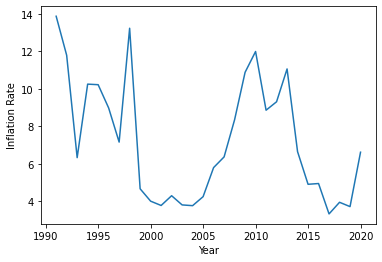

In [8]:
plt.plot(c,a)
plt.xlabel("Year")
plt.ylabel("Inflation Rate")

Text(0, 0.5, 'Unemployment Rate')

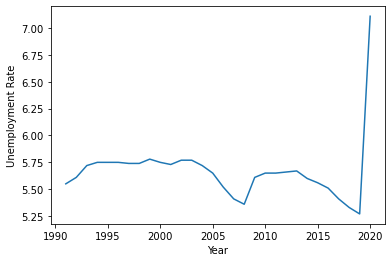

In [9]:
plt.plot(c,b)
plt.xlabel("Year")
plt.ylabel("Unemployment Rate")  

In [10]:
df.iloc[:,1].isnull()
    

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
Name: Inflation Rate, dtype: bool

In [11]:
df.iloc[:,2].isnull()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
Name: Unemployment Rate, dtype: bool

<AxesSubplot:>

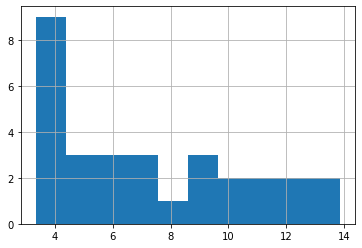

In [12]:
df.iloc[:,1].hist()

<AxesSubplot:>

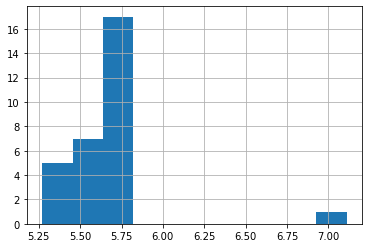

In [13]:
df.iloc[:,2].hist()

In [14]:
df=df.drop([0])

In [15]:
df

,Year,Inflation Rate,Unemployment Rate
1,2019,3.72,5.27
2,2018,3.95,5.33
3,2017,3.33,5.41
4,2016,4.95,5.51
5,2015,4.91,5.56
6,2014,6.65,5.60
7,2013,11.06,5.67
8,2012,9.31,5.66
9,2011,8.86,5.65
10,2010,11.99,5.65


<AxesSubplot:>

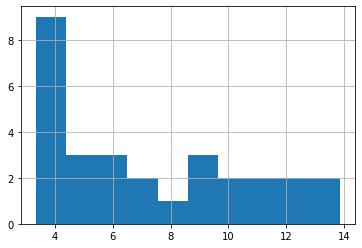

In [16]:
df.iloc[:,1].hist()


<AxesSubplot:>

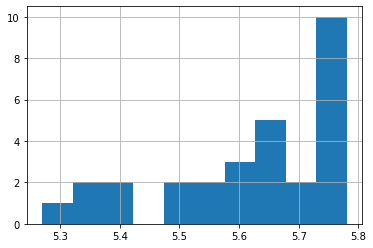

In [17]:
df.iloc[:,2].hist()

In [18]:
mask = df.dtypes == np.float
float_cols = df.columns[mask]

skew_limit = 1 # define a limit above which we will log transform
skew_vals = df[float_cols].skew()

<ipython-input-18-95c8e8dfe8b4>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = df.dtypes == np.float


In [19]:
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

,Skew


In [20]:
df.corr()


,Year,Inflation Rate,Unemployment Rate
Year,1.000000,-0.376886,-0.636373
Inflation Rate,-0.376886,1.000000,0.176902
Unemployment Rate,-0.636373,0.176902,1.000000


In [21]:
pearsonr(df['Inflation Rate'],df['Unemployment Rate'])

(0.17690176551559103, 0.35861358816418476)

Text(0, 0.5, 'Inflation Rate')

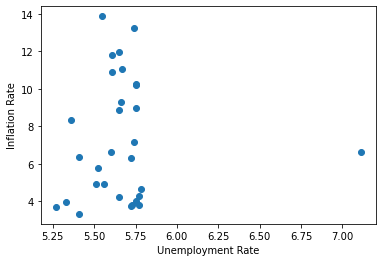

In [22]:
plt.scatter(x=b, y=a)
plt.xlabel('Unemployment Rate')
plt.ylabel('Inflation Rate')

